In [ ]:
import pandas as pd
import numpy as np


# Load a single chunk
chunk_file = (
    "C:/Afeka/Afeka_DL_course_labs/src/task_2/data/household_power_consumption_0.csv"
)
df = pd.read_csv(
    chunk_file,
    low_memory=False,
)

# Combine Date and Time into a single datetime column and set as index
df["dt"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S")
df.set_index("dt", inplace=True)
# Drop the original Date and Time columns
df.drop(columns=["Date", "Time"], inplace=True)
# Drop rows with missing values
df.replace("?", np.nan, inplace=True)

# Display basic info about the DataFrame
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207525 entries, 2006-12-16 17:24:00 to 2007-05-09 20:08:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    203793 non-null  object 
 1   Global_reactive_power  203793 non-null  object 
 2   Voltage                203793 non-null  object 
 3   Global_intensity       203793 non-null  object 
 4   Sub_metering_1         203793 non-null  object 
 5   Sub_metering_2         203793 non-null  object 
 6   Sub_metering_3         203793 non-null  float64
dtypes: float64(1), object(6)
memory usage: 12.7+ MB
None
                    Global_active_power Global_reactive_power  Voltage  \
dt                                                                       
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00      

In [ ]:
# set all columns as float
for col in df.columns[1:]:
    df[col] = df[col].astype("float64")

In [ ]:
df.dtypes

Global_active_power       object
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:

# set all columns as float
for col in df.columns:
    df[col] = df[col].astype("float64")


In [ ]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
# Handle missing values by filling them with the median of each column
df.fillna(df.median(), inplace=True)

In [ ]:
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

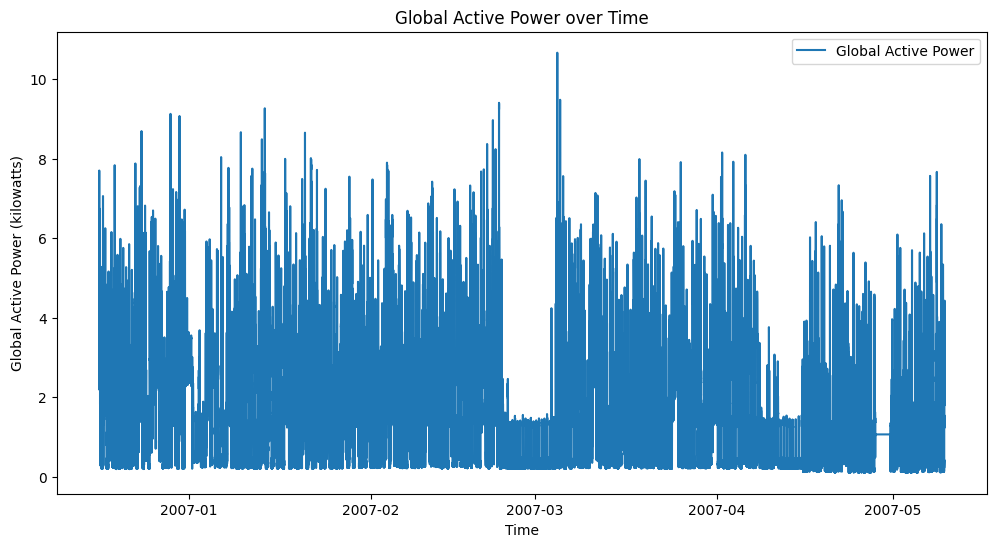

In [ ]:
# Step 2: Visualize Time Series Trends
import matplotlib.pyplot as plt

# Plot Global_active_power over time
plt.figure(figsize=(12, 6))
plt.plot(df["Global_active_power"], label="Global Active Power")
plt.xlabel("Time")
plt.ylabel("Global Active Power (kilowatts)")
plt.title("Global Active Power over Time")
plt.legend()
plt.show()